# Instagram Followers

<b>Use Case:</b> Ever wondered which accounts you are following but do not follow you back? Or which accounts that follow you but you are not following? Here is a simple way to quickly see who!

This method to me is safer than downloading third-party apps as it is less intrusive. It does not utilise web scraping though, so that may be a room for improvement.

In [137]:
# Libraries

import pandas as pd
import re

### Dataset - Followers

The below is to create a dataset of who my current IG followers are. Note that all explicit references to my friends' usernames have been removed for privacy issues.

In [138]:
# Data - Followers Set

with open('IG Followers.txt') as file:
    x = file.read()

Looking through the HTML code, I realised that there was a pattern - the tag "d7ByH" was used to designate a username. Hence, my plan is to split the entire data on this tag, and use regex to quickly find the username. I will then populate a list filled with my current followers.

In [139]:
splitted = x.split('d7ByH')

As a proof of concept, I shall attempt to work with a single item and see if I can extract the username as required. Used the last item here (but any will do).

In [ ]:
splitted[-1]

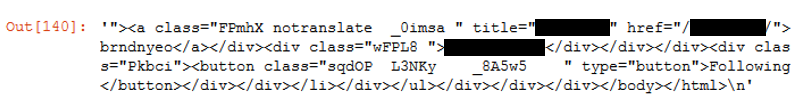

In [ ]:
pattern = r'title="\w*"'
name = re.findall(pattern, splitted[-1])
name = name[0][7:].rstrip('"')
print(name)

And yes, I managed to extract the username from the cell above! Output is not shown here for privacy reasons.

Noticed that usernames with special characters, such as '.' will raise an error with the above pattern. For example, a username with "happy.boy" will raise an exception. So to adjust it, we edited the below pattern.

Furthermore, rstrip() did not work perfectly for a few cases. There were varying results with <i>'happy.boy"'</i> while others with <i>'happy.girl " href="'</i>. 

Hence, we shall use slicing and indexing to get rid of the <i>" href="</i> or <i>"</i> parts of the username.

In [124]:
pattern = r'title="\w*\W*\w*\W*\w*"'
followers = []

for x in splitted:
    try:
        name = re.findall(pattern, x)
        name = name[0][7:]
        idx = re.search('"', name).span()[0] # to remove anything after '"'
        #print(name, idx)
        name = name[:idx]
        #print(name)
        followers.append(name)
    except:
        print(x)
        followers.append(x)

In [125]:
followers = followers[1:] # remove the first item, was header
print(len(followers)) # number matches the one in Instagram. Job done well.

460


The followers list has a length of 460 names - exactly as stated on my Instagram page. Hence, the above codes are a success!

### Dataset - Following

For now, we move on to creating a list of accounts that I am following. I use the same method as I had used to get the followers list. Note that the tag "d7ByH" applies here as well.

In [132]:
# Data - Following Set

with open('IG Following.txt') as file:
    x = file.read()
    
splitted = x.split('d7ByH')
splitted = splitted[1:]
len(splitted)

633

In [133]:
pattern = r'title="\w*\W*\w*\W*\w*"'
following = []

for x in splitted:
    try:
        name = re.findall(pattern, x)
        name = name[0][7:]
        idx = re.search('"', name).span()[0] # to remove anything after '"'
        #print(name, idx)
        name = name[:idx]
        #print(name)
        following.append(name)
    except:
        print(x)
        following.append(x)

In [135]:
len(following)

633

The length of the usernames that I follow is indeed correct. Now for some analysis!

# Analysis

Now, I want to find out which users that I follow are not following me back. It is normal to have a long list here as there may be many accounts that I have followed due to their interesting content (dance, martial arts etc.) so just because a username appears here does not necessarily mean anything.

In [ ]:
not_follower_back = []

for user in following:
    if user not in followers:
        not_follower_back.append(user)
        
print(len(not_follower_back), not_follower_back)

And now to see which followers I am not following.

In [ ]:
i_never_follow = []

for name in followers:
    if name not in following:
        i_never_follow.append(name)

print(len(i_never_follow), i_never_follow)

There is only one! Upon closer inspection, this account has a requested follow from me but he/she has not accepted it yet.

## Conclusion / Where Do We Go From Here?

This was a fun personal project of mine. I wanted to explore the world of HTML tags, and using string splicing and regular expressions to solve problems. Essentially, this is a sort of text analytics project.

The tools used in this project can be applied in the business world as well, especially for social media managers.

This project can be used in businesses' social media accounts to see which followers the business itself is not following back. From there, the business can choose to follow such accounts in order to signal an interest in the other party, and build (business) relations.

Otherwise, it can also help find those who have since unfollowed you. For example, if an account you are following is not a follower anymore, you can then deduce that the person has lost interest in you. There may be other factors at play (or even just a mistake), but you at least have the tools to find out who these accounts are.